In [10]:
import os
import numpy as np
import pandas as pd



movies = pd.read_table('movies.dat', sep = '::', header = None, engine='python', encoding = "ISO-8859-1")

peliyear=movies[1].str.rsplit(pat='(', n=1, expand=True)
peliyear.rename(columns={0:'film', 1: 'year'}, inplace=True)
peliyear['year'] = peliyear['year'].str.replace(')','',regex=True)

movies = pd.concat([movies, peliyear], axis=1, join="inner")
movies.drop(0, axis=1, inplace=True)
movies.drop(1, axis=1, inplace=True)

categ=movies[2].str.split(pat='|', n=1, expand=True)
movies = pd.concat([movies, categ], axis=1, join="inner")
movies.drop(1, axis=1, inplace=True)
movies.drop(2, axis=1, inplace=True)
movies.rename(columns={0:'genre'}, inplace=True)
movies

,film,year,genre
0,Toy Story,1995,Animation
1,Jumanji,1995,Adventure
2,Grumpier Old Men,1995,Comedy
3,Waiting to Exhale,1995,Comedy
4,Father of the Bride Part II,1995,Comedy
...,...,...,...
3878,Meet the Parents,2000,Comedy
3879,Requiem for a Dream,2000,Drama
3880,Tigerland,2000,Drama
3881,Two Family House,2000,Drama


Text(0.5, 1.0, '1. Films by Genre')

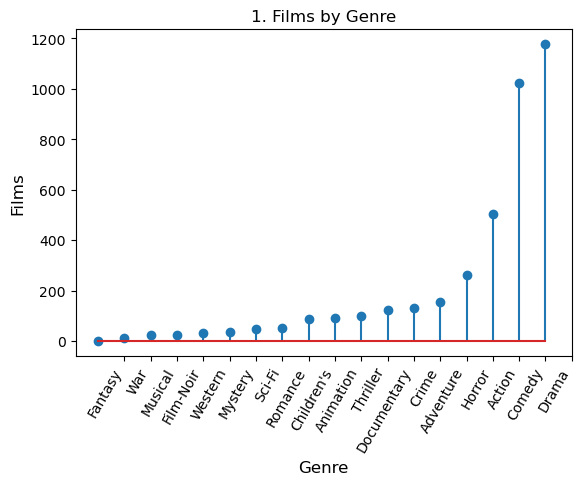

In [56]:
import matplotlib as mpl
import matplotlib.pyplot as plt

moviebygen=movies.groupby(['genre']).agg(quantity=('genre', 'count'))
moviebygen=moviebygen.reset_index(level='genre')

moviebygen = moviebygen.sort_values(by='quantity')
my_range=range(1,len(moviebygen)+1)

fig = plt.figure()
plt.stem(moviebygen['quantity'])
plt.xticks( my_range, moviebygen['genre'])
fig.autofmt_xdate(rotation=60)
plt.xlabel("Genre", size = 12,)
plt.ylabel("Films", size = 12)
plt.title("1. Films by Genre")

Text(0.5, 1.0, '2. Films by year')

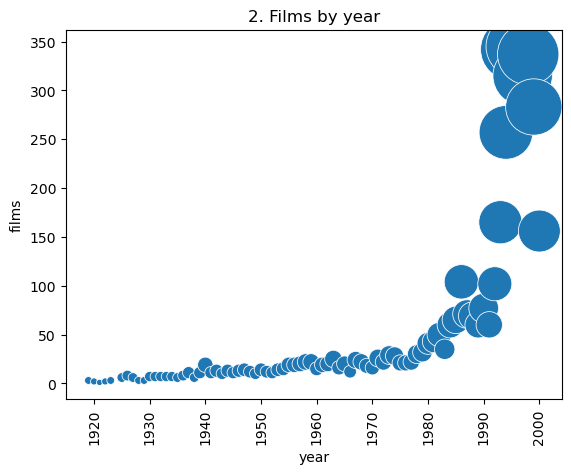

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

fd = movies.groupby(['year']).agg(films=('film', 'count'))
fd = fd.reset_index(level='year')
fd['year']=fd['year'].astype(int)


# use the scatterplot function to build the bubble map
sns.scatterplot(data=fd, x="year", y="films", size="films", legend=False, sizes=(20, 2000))
plt.xticks(rotation=90)
plt.xticks(range(1920,2001,10))
plt.title("2. Films by year")

In [ ]:
Justificacion

Con el dataframe movies y las columnas film, year, genre hay opción de agrupar y contar la cantidad de peliculas por genero,
cantidad por año. También cantidad peliculas de un generos por año podria ser interesante aunque la muestra de valores sería
menor.
En este caso he representado 1.Cantidad de películas por género y 2.Cantidad de películas por año para trabajar con una muestra mayor de datos